# Rainfall Prediction - Weather Forecasting

### Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia

Here we have to predict two things:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Importing the DataSet

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Exploratory Data Analysis (EDA)

In [4]:
#checking the size of the dataser
df.shape

(8425, 23)

We can see that we have 8425 rows and 23 columns in the dataset

In [5]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

We have these columns in the dataset. As we have to predict the "rainfall for tomorrow" and the "amount of rainfall" we will see the correlation of all the features with these two targets and see if all the features are related.

In [6]:
#getting an overall overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
#checking the data types of the dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We can see that we have both object and float datatypes

In [8]:
#checking the unique numbers of the dataset
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

By looking at these unique types we can say one of our target variable 'RainTomorrow' has 2 classes making it a classification problem while predicting tomorrows rainfall. The other target 'Rainfall' is a continuous data making it a regression problem.

In [9]:
#checkig the null values of the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

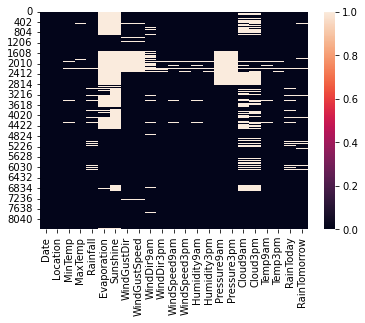

In [10]:
sns.heatmap(df.isnull())

We can clearly see from the dataset that apart from the date and location we have null values in almost all of the features and also the target values.

In [11]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('_________________________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
_________________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_________________________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
_________________________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
_________________________________
0.0      5299
0.2       406
0.4  

From the value counts we can see that the target variable rain tomorrow is imbalanced, will use SMOTE later

# Feature Engineering and Data Cleaning

### 1. As we have seen above that the date feature is showing as object however it is a numerical value.

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [14]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [15]:
# We will drop the Date column since we have extracted the Day, Month and Year and made seperate columns already.
df.drop(columns=['Date'],axis=1,inplace=True)

In [16]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


## Treating the Null Values by Imputation

In [17]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Filling null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

We can clearly see now that we have removed all the null values.

<AxesSubplot:>

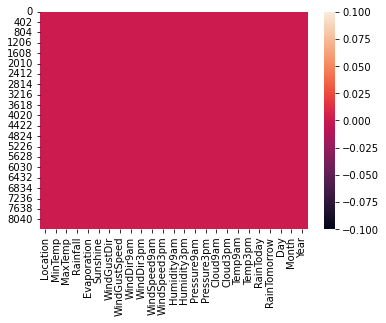

In [19]:
sns.heatmap(df.isnull())

We can clearly see that we have successfully treated all the null values and we dont have any null values in the dataset

## Statistical Summary of the Dataset

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,8425,12,Melbourne,1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,8425.0,NaN,NaN,NaN,13.193305,5.379488,-2.0,9.3,13.2,17.3,28.5
MaxTemp,8425.0,NaN,NaN,NaN,23.859976,6.114516,8.2,19.3,23.3,28.0,45.5
Rainfall,8425.0,NaN,NaN,NaN,2.725982,10.319872,0.0,0.0,0.0,0.8,371.0
Evaporation,8425.0,NaN,NaN,NaN,5.389395,3.852004,0.0,4.0,5.389395,5.389395,145.0
Sunshine,8425.0,NaN,NaN,NaN,7.632205,2.825451,0.0,7.632205,7.632205,8.9,13.9
WindGustDir,8425,16,N,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,8425.0,NaN,NaN,NaN,40.174469,13.776101,7.0,31.0,40.174469,48.0,107.0
WindDir9am,8425,16,N,1735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindDir3pm,8425,16,SE,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the "describe" method along with it's parameter "all" to include each and every column present in our dataset irrespective of them being numeric or text data. I have also used the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple times.

The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

# Data Visualization

## Checking the categorical columns and numerical columns

In [21]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [22]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


## Univariate Analysis of the categorical columns

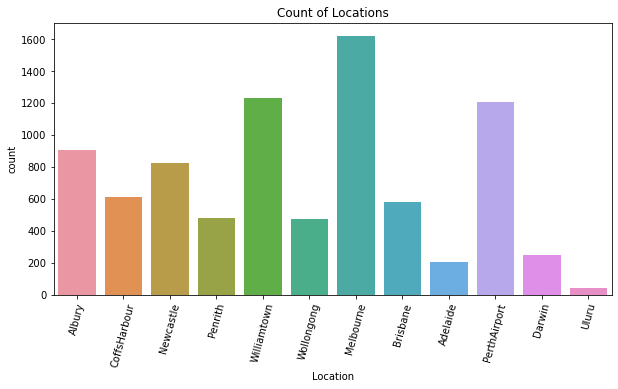

In [23]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

We have the highest rainfall data from Melbourbne and least from Uluru

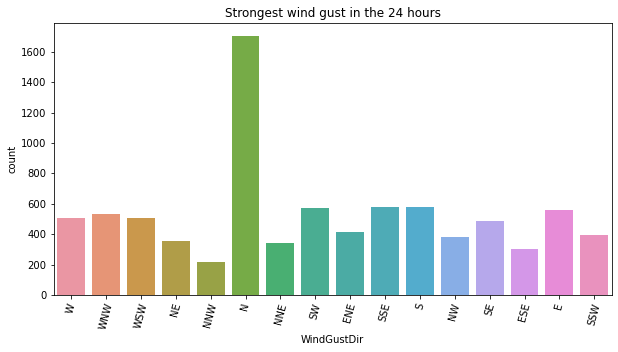

In [24]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S, WNW.

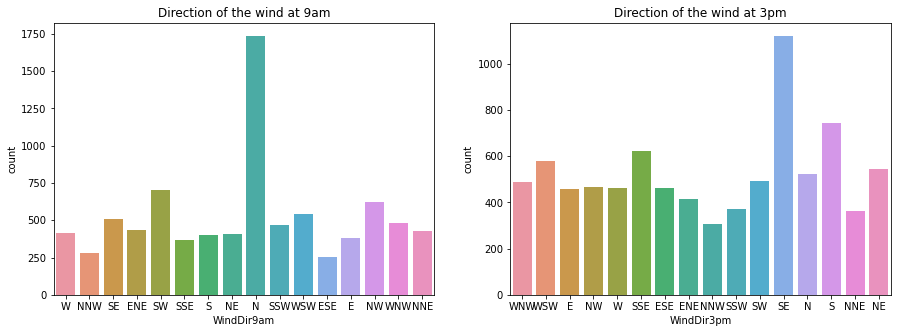

In [25]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

In the plots we can clearly see that the wing direction was towards the N at 9am and in the SE at 3pm

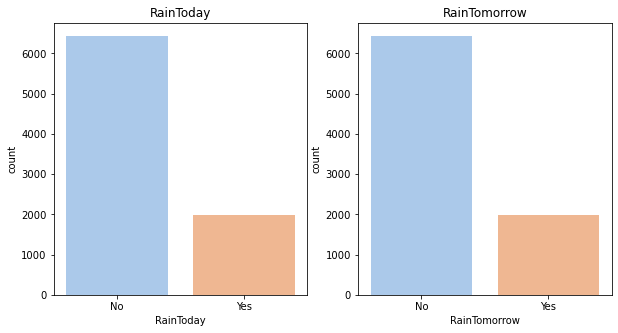

In [26]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

We can hardly see any difference in the rainfall today and tomorrow, we will see the corelation later and do the feature selection

## Visualizing the distribution of the numerical columns

In [27]:
len(num_col)

19

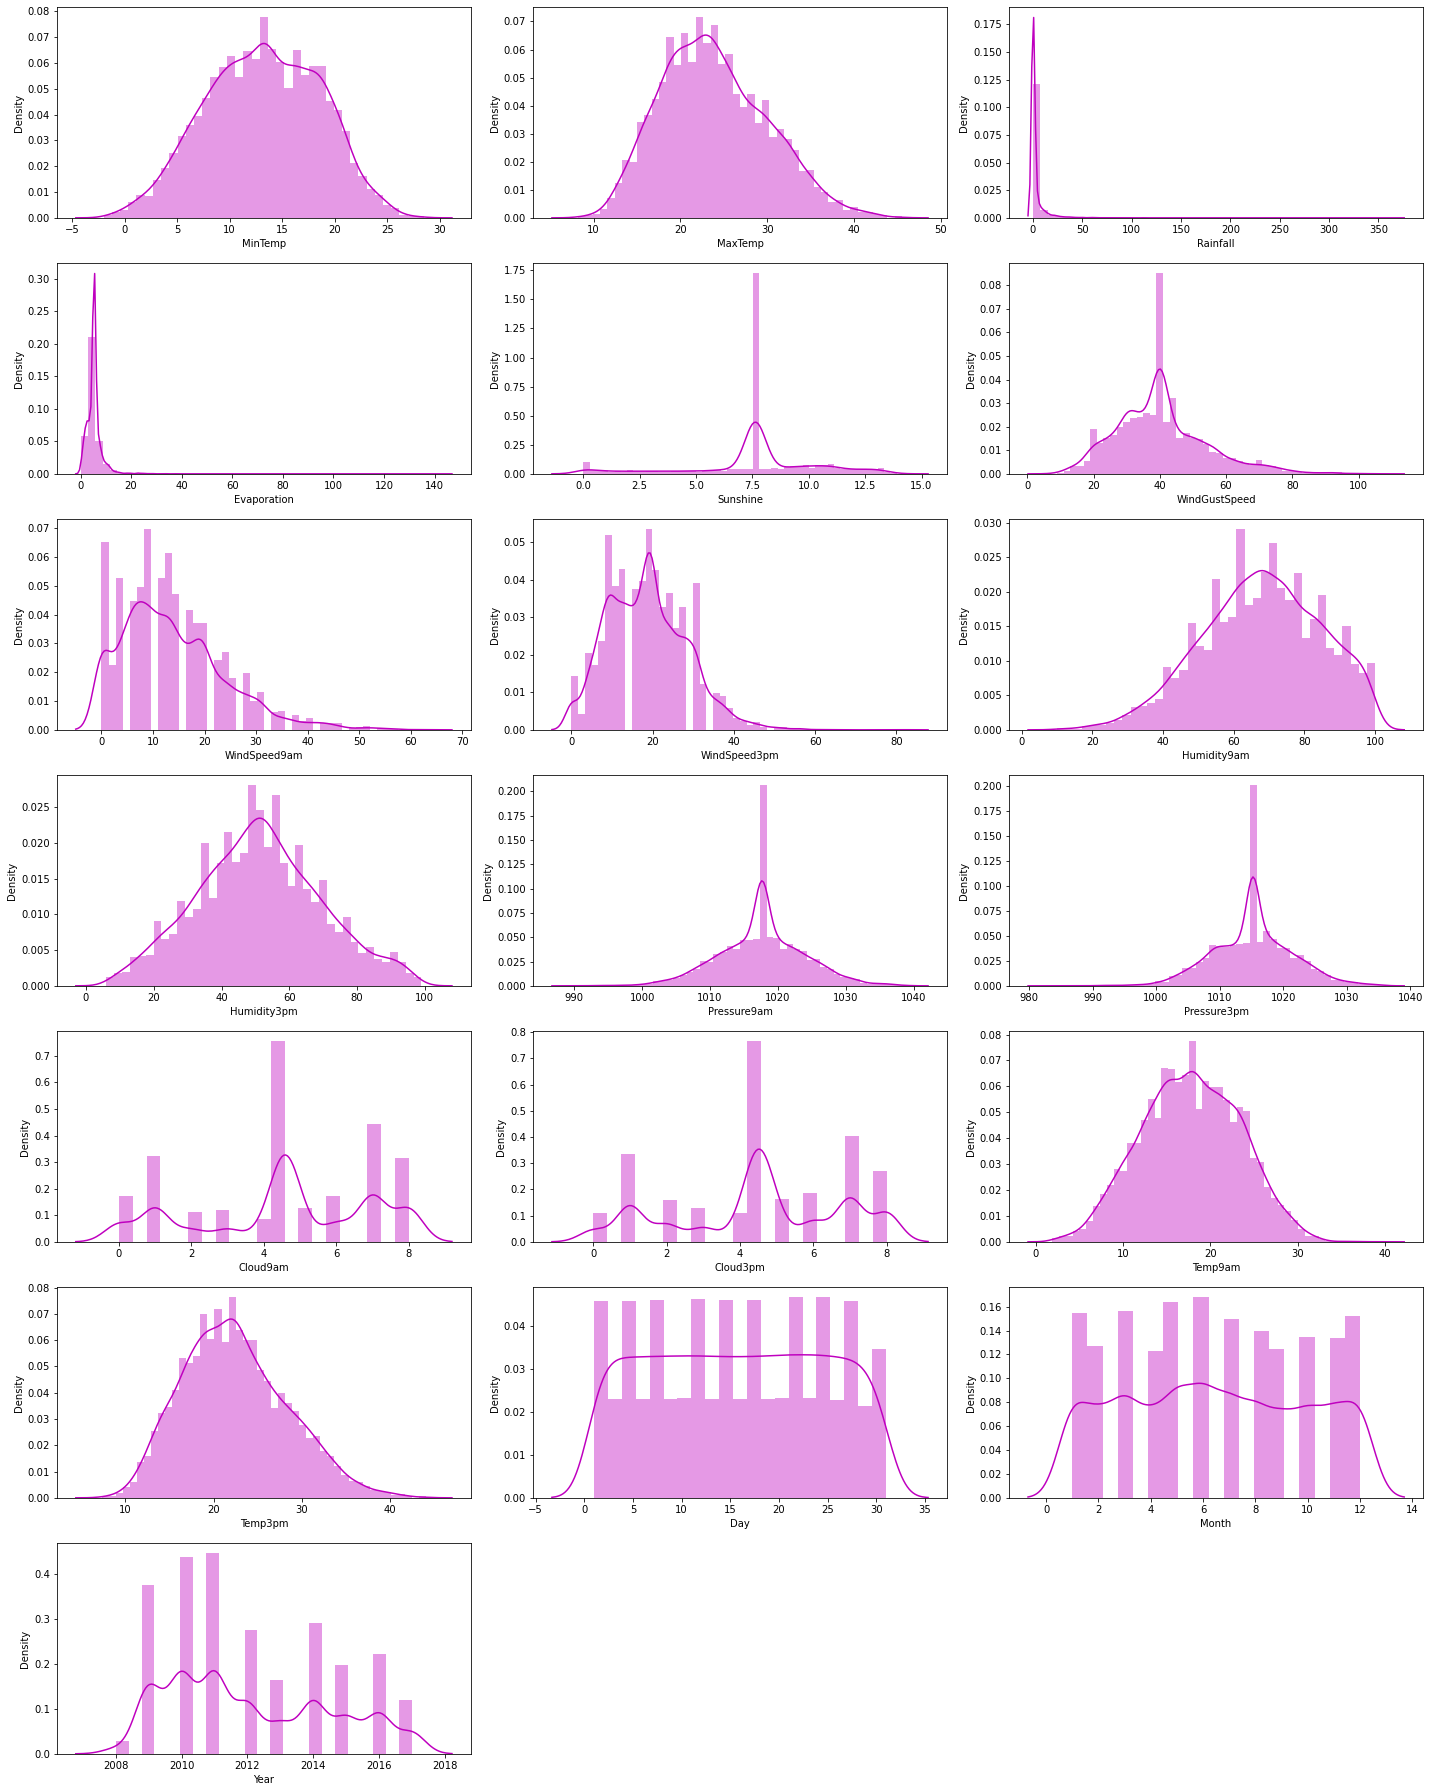

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the graphs we can say that the dataset is not normally distributed.

Min Temp is normally distributed.

Max Temp is slightly skewed.

Rainfall and Evaporation is more skewed.

Sunshine is not normally distributed.

WindGustSpeed, WindSpeed9am,WindSpeed3pm is more skewed.

Humidity9am is slightly skewed and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, Day, Month and Year has no skewness however the data is not distributed uniformly.

## Bivariate Analysis

Checking the relation between the features and the two targets we have

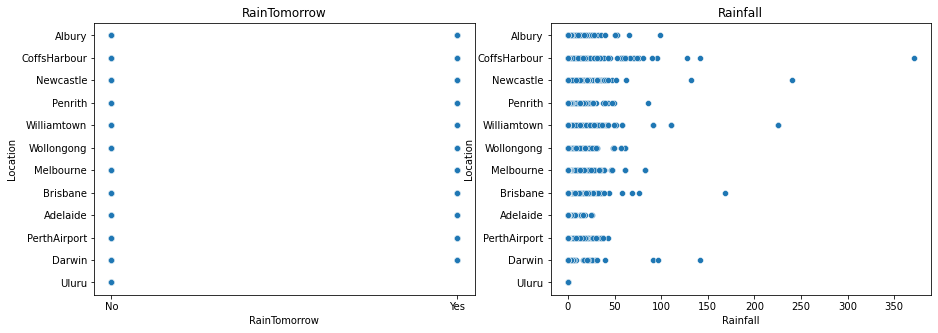

In [29]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have any major impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per region.

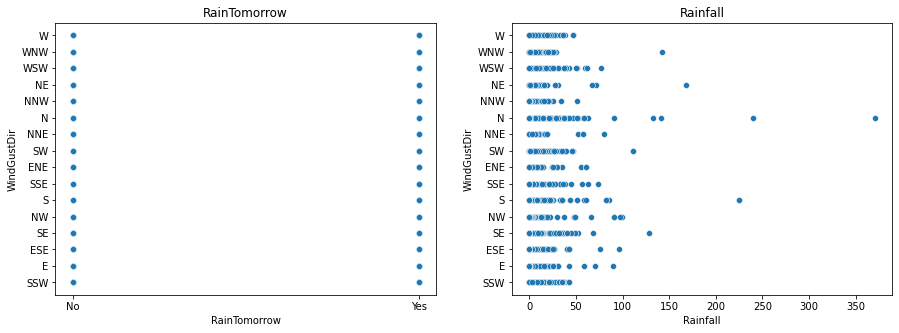

In [30]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

From this graph we can observe that there is no linear relation of the feature with both the targets

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

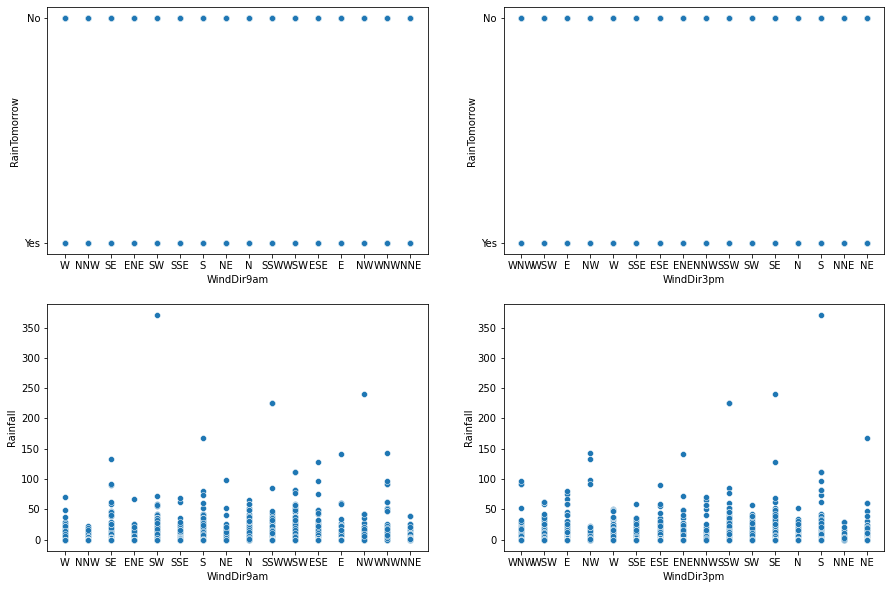

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We donot see any linear relation either

Checking the relation between Rainfall today and Rainfall Tomorrow

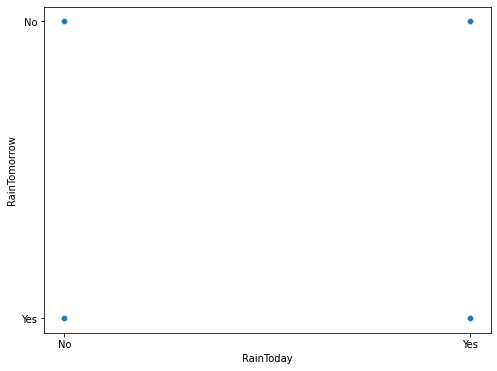

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

There is no relation that we can see in the scatter plot.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

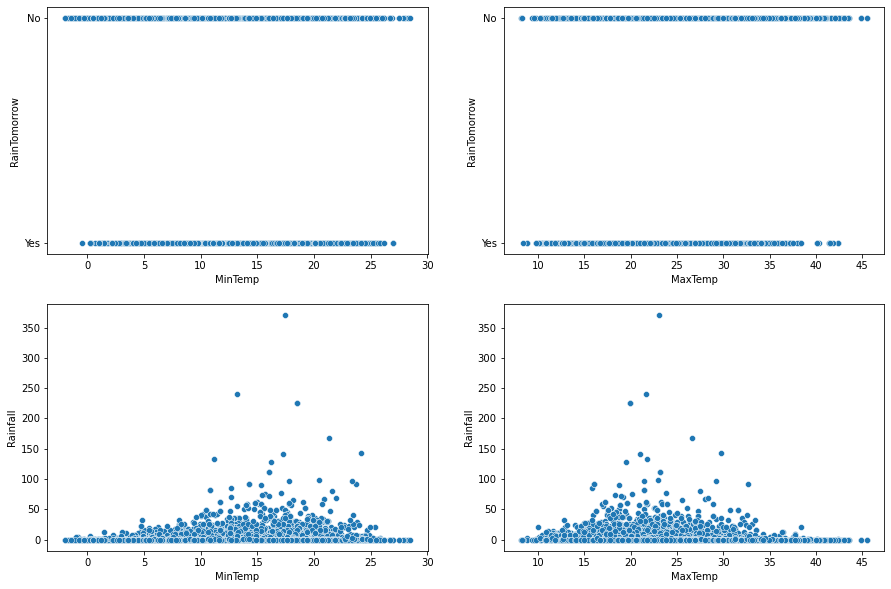

In [33]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

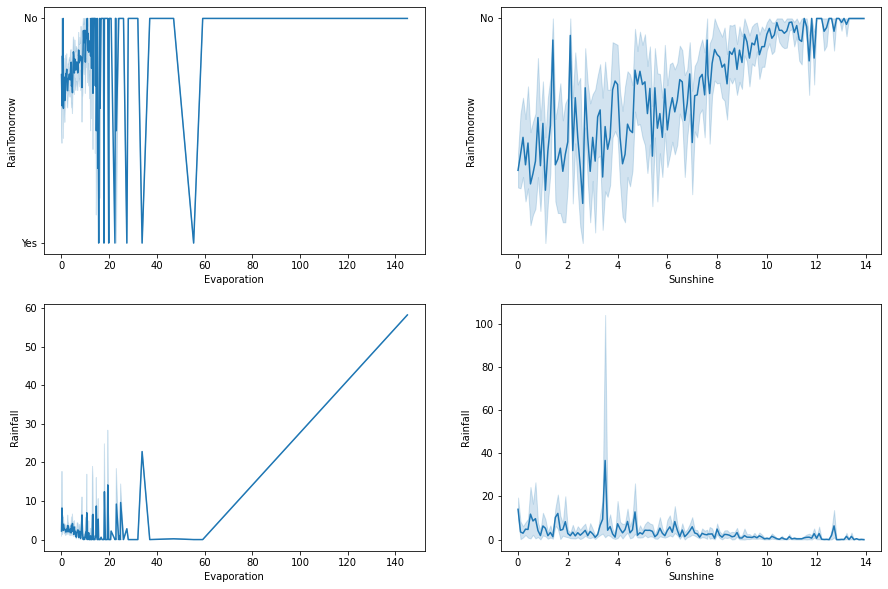

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see the relation in the graphs

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

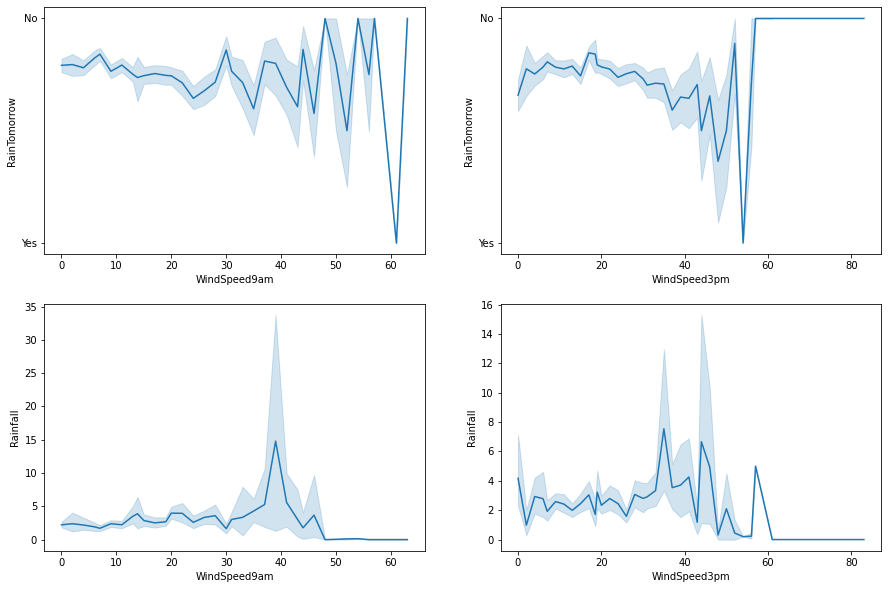

In [35]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relation seen in the above graphs

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

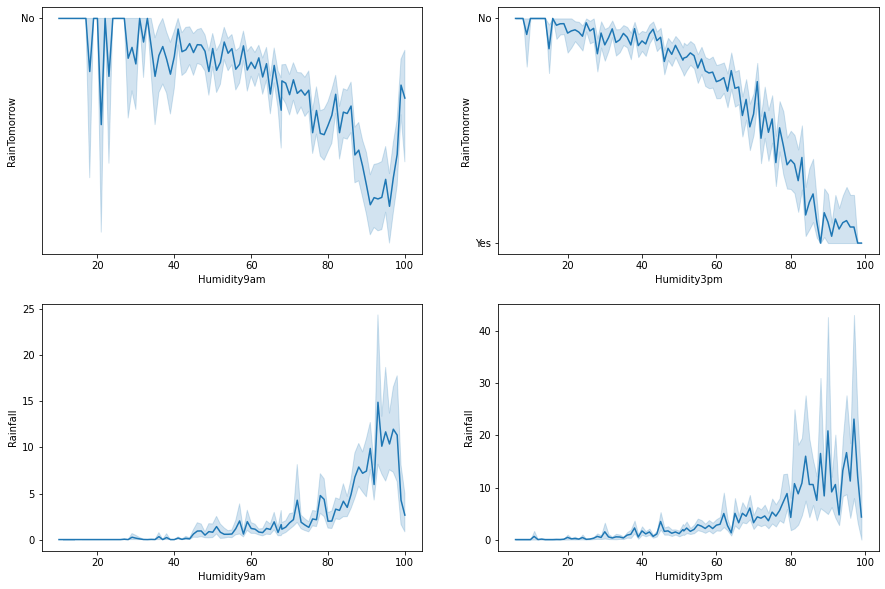

In [36]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Here we can see a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

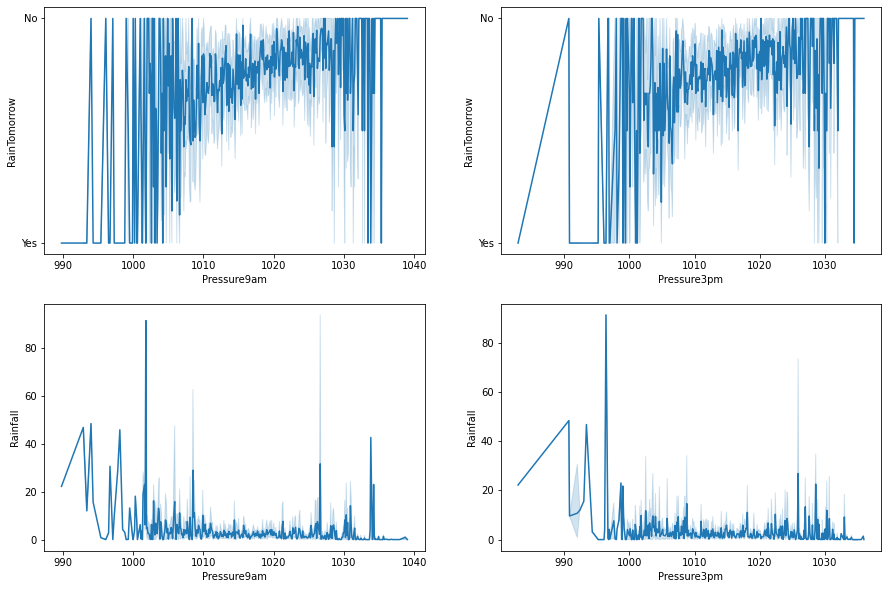

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

As the graph shows, we dont see an linear relation

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

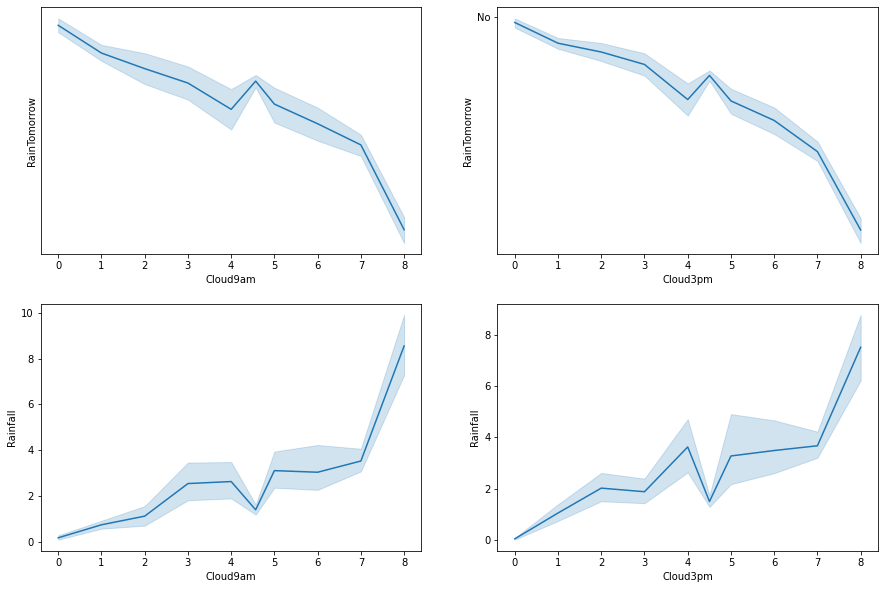

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

The graph shows a linear relationship, and inverse relationship between cloud9am and cloud3pm and rain tomorrow and a positive relationship between cloud9am and cloud3pm and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

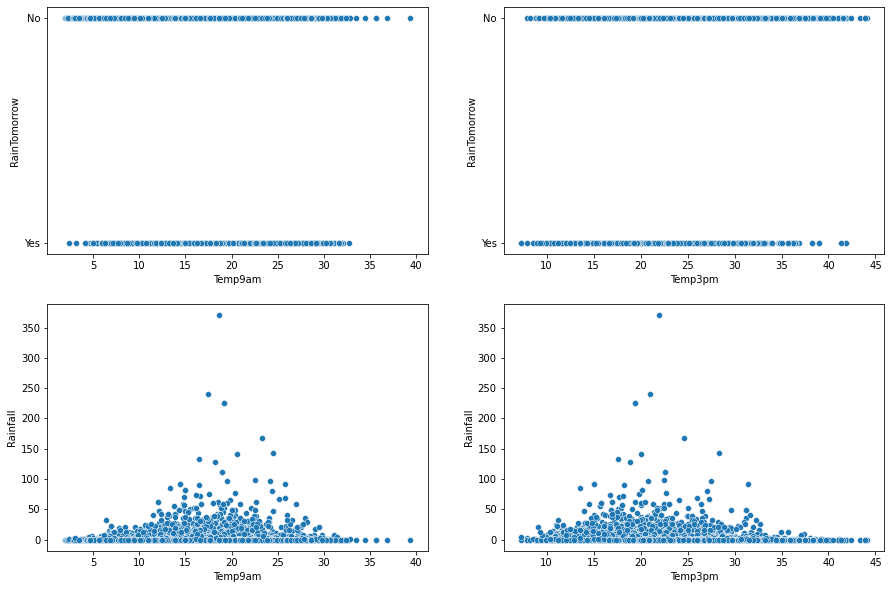

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relation that is seen in these plots.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

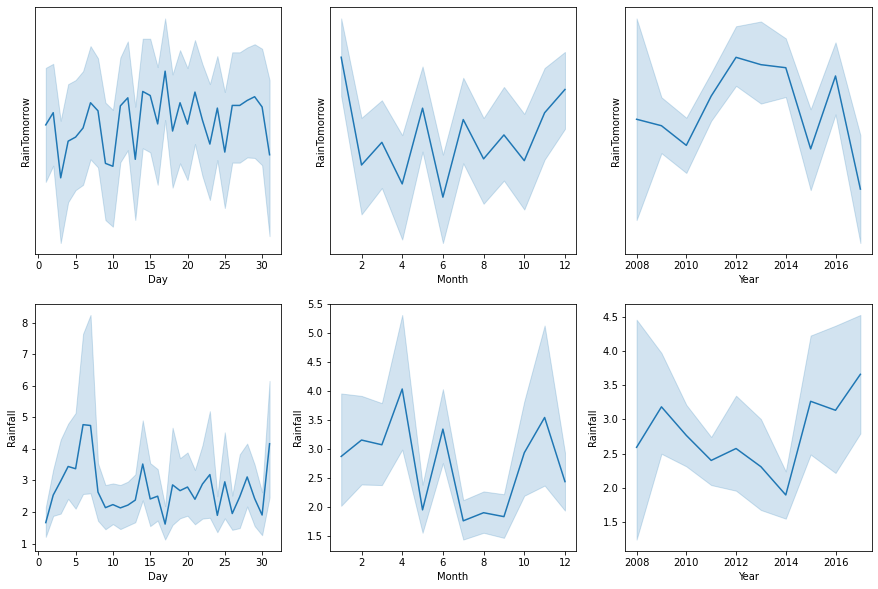

In [40]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

It can be clearly seen that there is no linear relationship.

## Identifying the Outliers

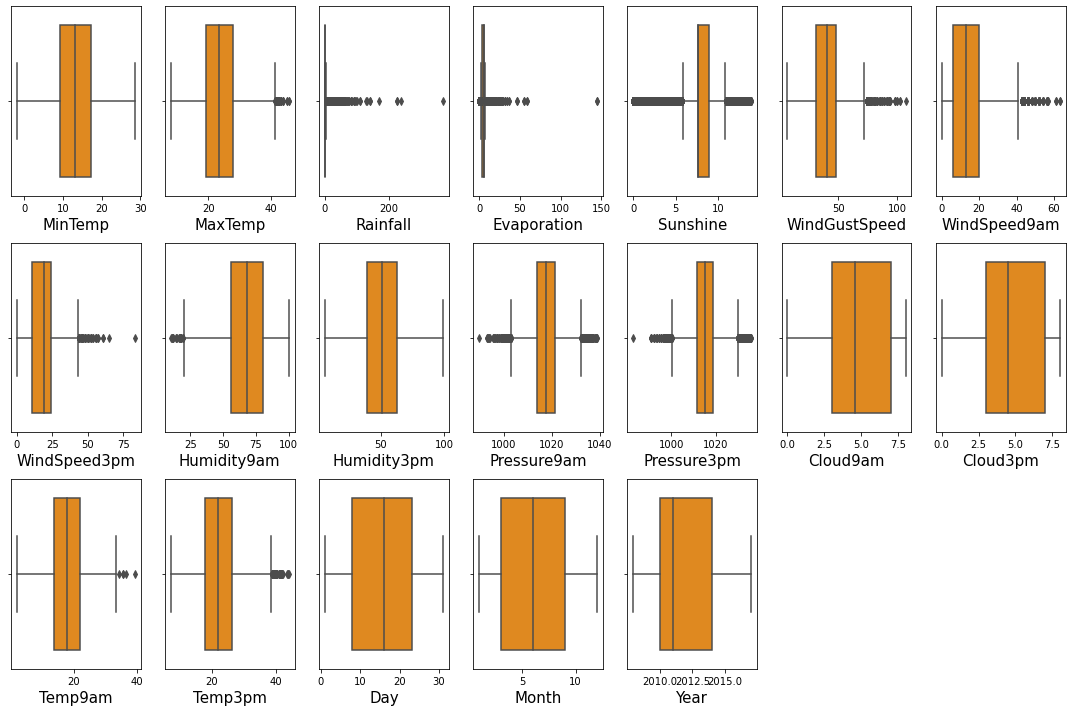

In [41]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed,  WindSpeed9am, Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

Lets remove the outliers using zscore method

## Removing Outliers

In [42]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [43]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [44]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [45]:
df.shape

(8425, 25)

In [46]:
new_df.shape

(7987, 25)

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

## Percentage data loss:

In [47]:
loss_percent=(8425-7987)/8425*100
print(loss_percent,'%')

5.198813056379822 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

5.1988% data loss is acceptable

# Checking the skewness of the dataset

In [48]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

We can see that features Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

## Removing skewness using log transformation

Since by trail and test when we applied log transformation on Sunshine, Windgustspeed and Windspeed9am

In [49]:
# We only applied the log transformation on Rainfall and Evaporation
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])

In [50]:
#checking skewness again
new_df.skew().sort_values()

Evaporation     -0.993594
Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Rainfall         1.811941
dtype: float64

In [51]:
# checking for numerical columns
new_df_num_col=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!='object':
        new_df_num_col.append(i)
print(new_df_num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


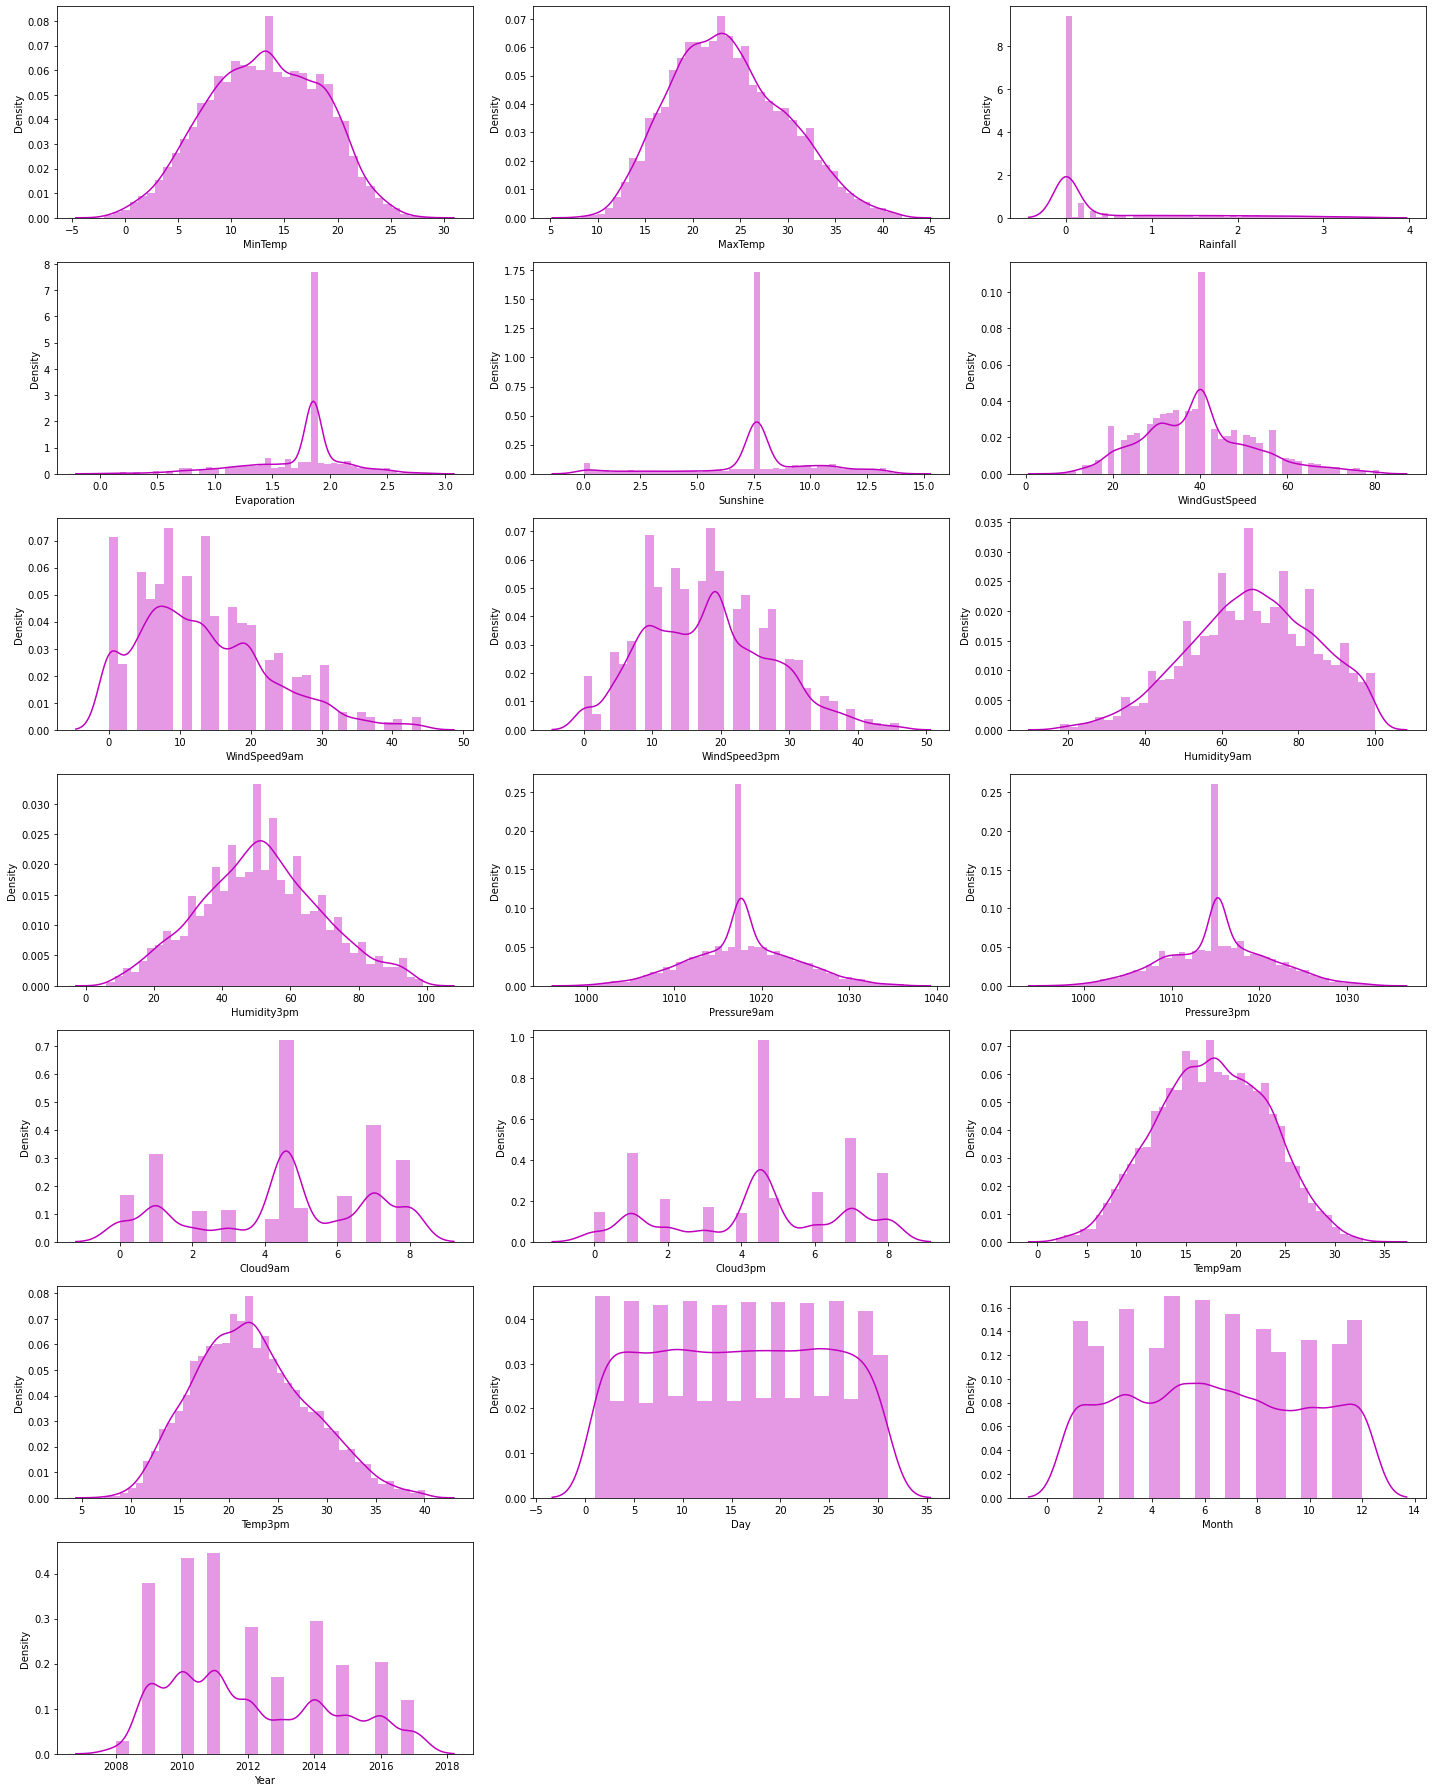

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in new_df_num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(new_df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can see that we have successfully reduced the Skewness 

## Encoding the categorical columns

In [53]:
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


Now we have converted the categorical columns into numerical columns using label encoding method.

## Checking the corelation between feature and label

In [54]:
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.065682,-0.154935,0.231097,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.387050,-0.237955,0.136337,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.221148,0.116389,0.089126,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.385395,-0.116103,0.155495,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.048579,0.065682,0.387050,-0.221148,0.385395,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675,0.003451,-0.000727,0.054960
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.104739,1.000000,0.005465,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.245658,0.231097,0.136337,0.089126,0.155495,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478,-0.005232,0.045638,-0.035546
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


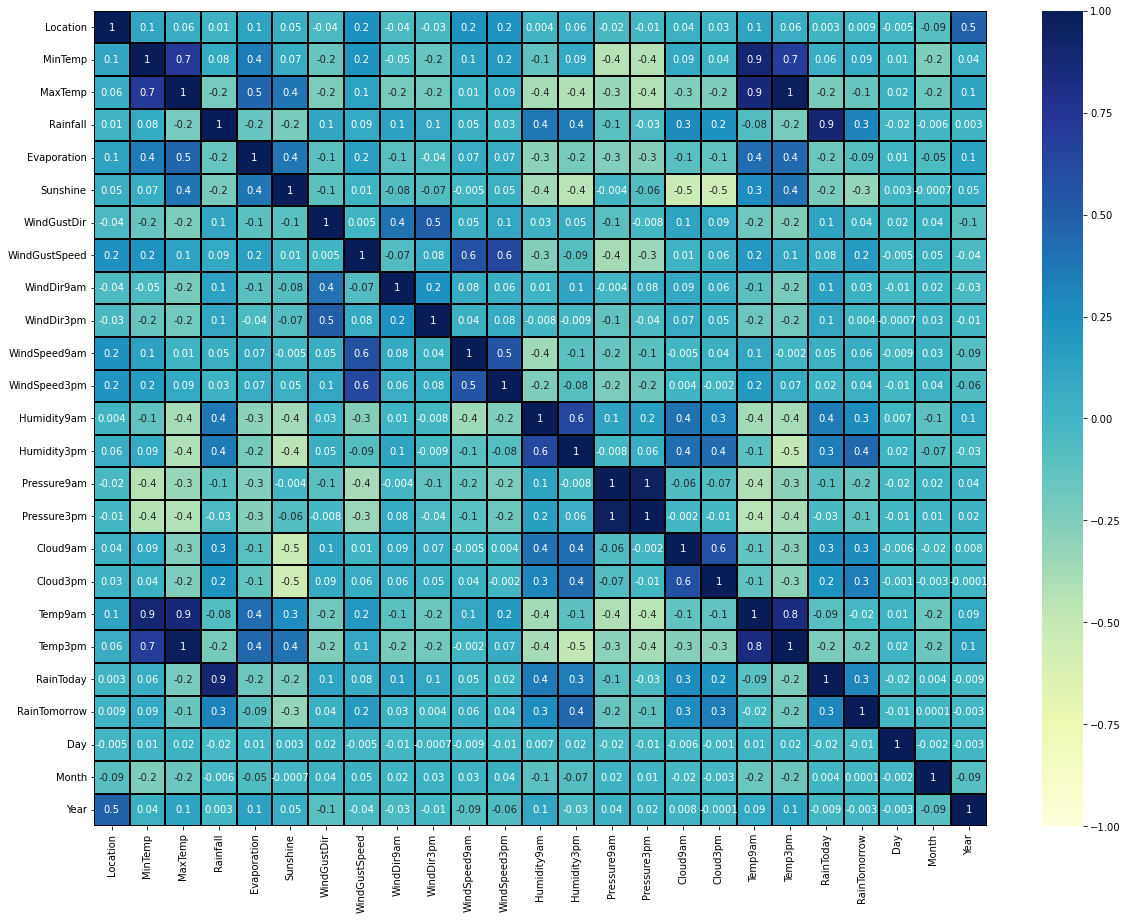

In [55]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [56]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.181478
MinTemp          0.091021
WindSpeed9am     0.057933
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.317675
Name: RainTomorrow, dtype: float64

Here we can clearly see that humidy has the highest correlation with RainTomorrow and sun shine has the lowest correlation.

In [57]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.089126
MinTemp          0.080984
WindSpeed9am     0.048200
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
MaxTemp         -0.206494
Temp3pm         -0.215864
Sunshine        -0.221148
Name: Rainfall, dtype: float64

Here we can clearly see that RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

## Visualizing the correlation between label and features using bar plot

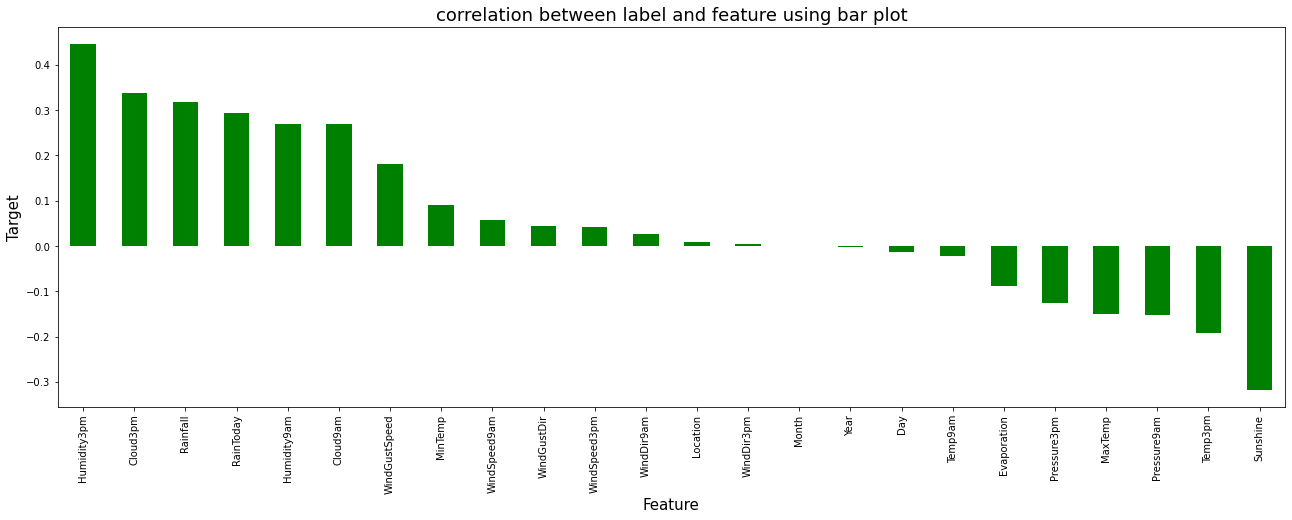

In [58]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Using the above plot we can see the correlation between label and feature using bar plot.

# (a) Prediction for Rain-Tomorrow

## Data Pre-processing

## Splitting feature and label into x and y

In [59]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

Here we have seperated the feature and the label.

## Feature Scaling using Standard Scaler

In [60]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,-0.013374,1.229267,0.364103,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,-0.013374,1.441960,0.364103,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,-0.013374,1.654654,0.520531,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,-0.013374,1.229267,0.129462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,-0.013374,-0.897670,-0.183394,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,-0.013374,0.378492,-0.887318,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


The dataset has been now scaled to avoid any kind of bias in the modelling.

## Checking Multicollinearity

In [61]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [62]:
calc_vif(x)

,Features,VIF values
0,Location,1.571653
1,MinTemp,8.789522
2,MaxTemp,26.417899
3,Rainfall,5.628777
4,Evaporation,1.532017
5,Sunshine,1.983348
6,WindGustDir,1.615549
7,WindGustSpeed,2.319419
8,WindDir9am,1.348963
9,WindDir3pm,1.484001


We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [63]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [64]:
calc_vif(x)

,Features,VIF values
0,Location,1.570986
1,MinTemp,8.753259
2,MaxTemp,9.631414
3,Rainfall,5.625805
4,Evaporation,1.530223
5,Sunshine,1.983149
6,WindGustDir,1.612378
7,WindGustSpeed,2.307151
8,WindDir9am,1.347905
9,WindDir3pm,1.482953


In [65]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [66]:
calc_vif(x)

,Features,VIF values
0,Location,1.570985
1,MinTemp,8.634145
2,MaxTemp,9.238668
3,Rainfall,5.614540
4,Evaporation,1.513642
5,Sunshine,1.977987
6,WindGustDir,1.598359
7,WindGustSpeed,2.289769
8,WindDir9am,1.327899
9,WindDir3pm,1.412314


In [67]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [68]:
calc_vif(x)

,Features,VIF values
0,Location,1.568607
1,MinTemp,4.489769
2,MaxTemp,5.496337
3,Rainfall,5.602864
4,Evaporation,1.509171
5,Sunshine,1.970041
6,WindGustDir,1.596704
7,WindGustSpeed,2.253248
8,WindDir9am,1.327891
9,WindDir3pm,1.411852


Since "Temp3pm", "Pressure9am" and "Temp9am" have negative correlations with "RainTomorrow" and at the same time high VIF value hence we have dropped those 3 columns.

Now we can see that we have corrected the multi-collinearity issue. We will proceed with SMOTE next.

# SMOTE

In [69]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this using SMOTE to avoid any bias.

In [70]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [71]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now our data is balanced, so we can build our ML model.

# Machine Learning

## Finding best random state

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

For Test size .30

In [73]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9437685861043525  on Random_state  85


For Test size .20

In [74]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9509326845093269  on Random_state  132


We have got the best random state as 174 for test size 0.20

## Feature Importance

,Importance
Features,
Humidity3pm,0.163
Cloud3pm,0.099
Rainfall,0.071
Humidity9am,0.059
WindGustSpeed,0.054
Sunshine,0.052
Pressure3pm,0.047
Cloud9am,0.042
MaxTemp,0.039


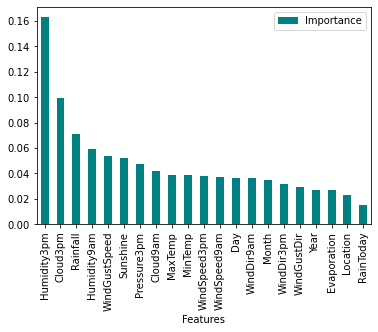

In [75]:
# Lets ckeck the feature importance using Random Forest Regressor

rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

With the help of Random Forest Classifier we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

In [76]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [77]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=174)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Confusion Matrix
    Confusion_Matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:\n", Confusion_Matrix)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [78]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 77.5750202757502

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      1272
           1       0.78      0.75      0.76      1194

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

Confusion Matrix:
 [[1014  258]
 [ 295  899]]

Cross Validation Score: 71.51662611516626

Accuracy Score - Cross Validation Score is 6.058394160583944


### Naive Bayes

In [79]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 72.06001622060016

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1272
           1       0.73      0.68      0.70      1194

    accuracy                           0.72      2466
   macro avg       0.72      0.72      0.72      2466
weighted avg       0.72      0.72      0.72      2466

Confusion Matrix:
 [[966 306]
 [383 811]]

Cross Validation Score: 70.43795620437956

Accuracy Score - Cross Validation Score is 1.6220600162206011


### SVC Classifier

In [80]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 85.19870235198702

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1272
           1       0.83      0.87      0.85      1194

    accuracy                           0.85      2466
   macro avg       0.85      0.85      0.85      2466
weighted avg       0.85      0.85      0.85      2466

Confusion Matrix:
 [[1066  206]
 [ 159 1035]]

Cross Validation Score: 73.72262773722628

Accuracy Score - Cross Validation Score is 11.476074614760748


In [81]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 77.08840227088403

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1272
           1       0.77      0.75      0.76      1194

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466

Confusion Matrix:
 [[1004  268]
 [ 297  897]]

Cross Validation Score: 71.15977291159773

Accuracy Score - Cross Validation Score is 5.928629359286305


In [82]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 83.45498783454988

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1272
           1       0.84      0.82      0.83      1194

    accuracy                           0.83      2466
   macro avg       0.83      0.83      0.83      2466
weighted avg       0.83      0.83      0.83      2466

Confusion Matrix:
 [[1084  188]
 [ 220  974]]

Cross Validation Score: 73.68207623682076

Accuracy Score - Cross Validation Score is 9.77291159772912


### Decision Tree Classifier

In [83]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 88.28061638280616

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1272
           1       0.87      0.89      0.88      1194

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466

Confusion Matrix:
 [[1114  158]
 [ 131 1063]]

Cross Validation Score: 72.78994322789943

Accuracy Score - Cross Validation Score is 15.49067315490673


### KNeighbors Classifier

In [84]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 86.45579886455799

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      1272
           1       0.80      0.97      0.87      1194

    accuracy                           0.86      2466
   macro avg       0.88      0.87      0.86      2466
weighted avg       0.88      0.86      0.86      2466

Confusion Matrix:
 [[ 977  295]
 [  39 1155]]

Cross Validation Score: 73.05758313057584

Accuracy Score - Cross Validation Score is 13.398215733982155


### SGD Classifier

In [85]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 75.87185725871858

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.76      1272
           1       0.73      0.80      0.76      1194

    accuracy                           0.76      2466
   macro avg       0.76      0.76      0.76      2466
weighted avg       0.76      0.76      0.76      2466

Confusion Matrix:
 [[917 355]
 [240 954]]

Cross Validation Score: 71.72749391727493

Accuracy Score - Cross Validation Score is 4.1443633414436505


### Random Forest Classifier

In [86]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 94.20113544201135

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1272
           1       0.94      0.94      0.94      1194

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466

Confusion Matrix:
 [[1206   66]
 [  77 1117]]

Cross Validation Score: 78.15085158150852

Accuracy Score - Cross Validation Score is 16.05028386050283


In [87]:
model = RandomForestClassifier(random_state=174)
classifier(model, x, y)

Accuracy Score: 93.95782643957827

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1272
           1       0.94      0.94      0.94      1194

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466

Confusion Matrix:
 [[1199   73]
 [  76 1118]]

Cross Validation Score: 79.28629359286295

Accuracy Score - Cross Validation Score is 14.671532846715323


### ExtraTrees Classifier

In [88]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 94.8499594484996

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1272
           1       0.94      0.95      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466

Confusion Matrix:
 [[1199   73]
 [  54 1140]]

Cross Validation Score: 79.65936739659367

Accuracy Score - Cross Validation Score is 15.190592051905938


In [89]:
model = ExtraTreesClassifier(random_state=174)
classifier(model, x, y)

Accuracy Score: 95.21492295214922

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1272
           1       0.94      0.96      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466

Confusion Matrix:
 [[1198   74]
 [  44 1150]]

Cross Validation Score: 79.52149229521493

Accuracy Score - Cross Validation Score is 15.693430656934297


### AdaBoost Classifier

In [90]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 81.10300081103001

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1272
           1       0.81      0.79      0.80      1194

    accuracy                           0.81      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.81      0.81      0.81      2466

Confusion Matrix:
 [[1054  218]
 [ 248  946]]

Cross Validation Score: 66.2124898621249

Accuracy Score - Cross Validation Score is 14.890510948905117


### Gradient Boosting Classifier

In [91]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 86.00973236009733

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1272
           1       0.86      0.85      0.86      1194

    accuracy                           0.86      2466
   macro avg       0.86      0.86      0.86      2466
weighted avg       0.86      0.86      0.86      2466

Confusion Matrix:
 [[1103  169]
 [ 176 1018]]

Cross Validation Score: 69.37550689375507

Accuracy Score - Cross Validation Score is 16.634225466342258


Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper Parameter Tuning

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=174)

In [93]:
x_test.shape

(2466, 21)

In [94]:
y_test.shape

(2466,)

In [95]:
x_train.shape

(9864, 21)

In [96]:
y_train.shape

(9864,)

In [97]:
#ExtraTreesClassifier?

In [98]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 174],
              'n_estimators': [100, 200, 300]}

In [99]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 174]})

In [101]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': None}

We got the best parameters using Gridsearch CV

In [102]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 300, n_jobs = -1 , random_state = None)   # final model with best parameters

In [103]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [104]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters

In [105]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  95.37712895377129


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [106]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 80.35685320356853


We got final accuracy score of 95.377% and Cross Validation Score of 80.3568% which is good

In [107]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1272
           1       0.94      0.96      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466



## Confusion Matrix

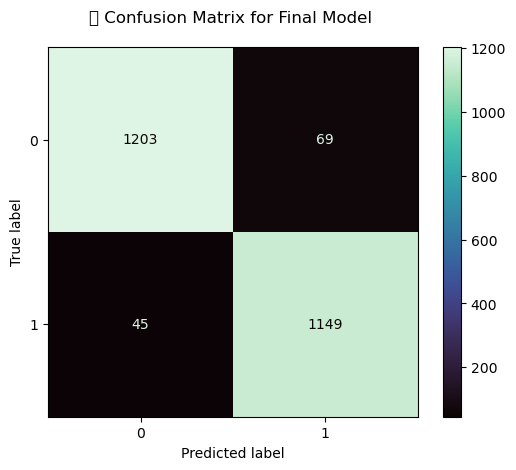

In [108]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

# AUC ROC curve

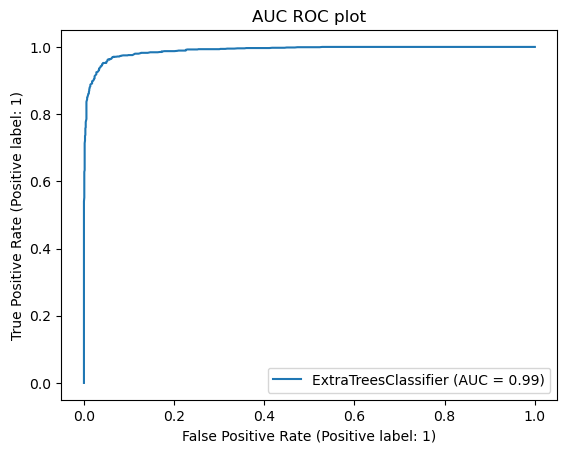

In [109]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 95.377% and Cross Validation Score of 80.3568% and also AUC score is 0.99 which is really good.

# Saving the model in pickle Format

In [110]:
# pickeling or serialization of a file
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

# Prediction Conclusion:

In [111]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
2461,1,1
2462,1,1
2463,0,0
2464,1,1


Hence predicted the "Rain_Tomorrow" using the final Model.

Saving the comparison file as a csv file.

In [112]:
df_comparisonc.to_csv('IRainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Prediction.csv')

Saved the file as a csv.

# (b) Prediction for Rainfall

## Data Preprocessing

## Splitting the label and feature

In [113]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [114]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

## Checking Correlation

In [115]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.089126
MinTemp          0.080984
WindSpeed9am     0.048200
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
MaxTemp         -0.206494
Temp3pm         -0.215864
Sunshine        -0.221148
Name: Rainfall, dtype: float64

Here we can clearly see that RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

## Visualizing the correlation between label and features using bar plot

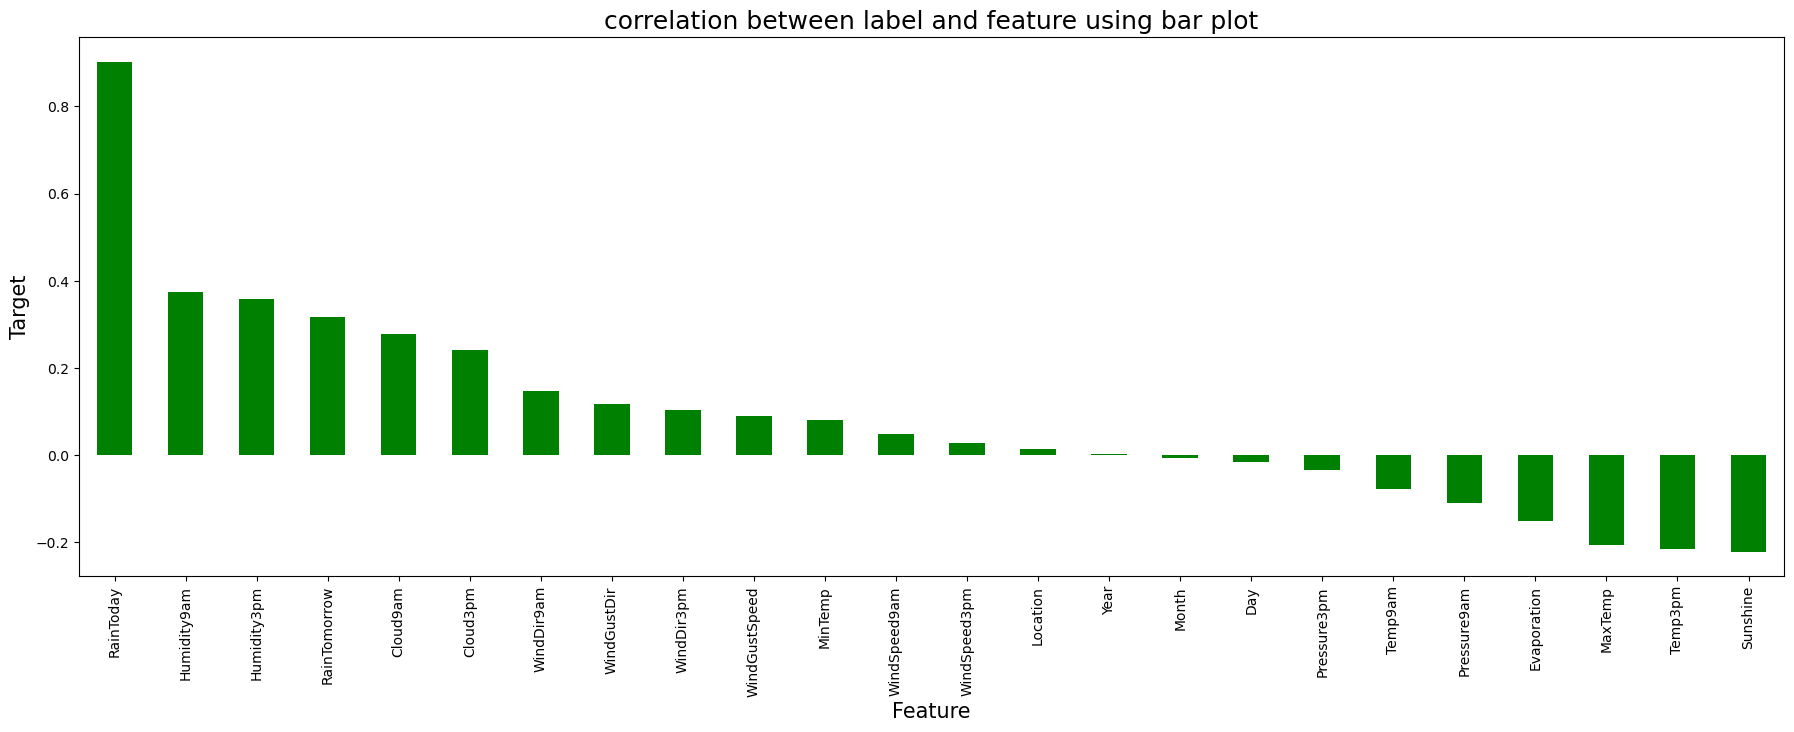

In [116]:
plt.figure(figsize=(22,7))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Using the above plot we can see the correlation between label and feature using bar plot.

## Feature Scaling using Standard Scaler

In [117]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,-0.013374,1.441960,0.364103,-0.277857,1.626597,-0.987382,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,-0.013374,1.654654,0.520531,1.250245,1.626597,0.606624,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,-0.243513,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,-0.013374,1.229267,0.129462,-1.369358,-0.184462,-0.668581,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,-0.030978,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,-0.030978,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,-0.013374,-0.897670,-0.183394,0.377044,1.400214,-0.456047,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,-0.013374,0.378492,-0.887318,0.595344,-1.089991,-0.030978,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


## Checking Multicollinearity

In [118]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [119]:
calc_vif(x)

,Features,VIF values
0,Location,1.581176
1,MinTemp,8.801356
2,MaxTemp,26.400793
3,Evaporation,1.532216
4,Sunshine,2.001639
5,WindGustDir,1.617841
6,WindGustSpeed,2.395013
7,WindDir9am,1.348140
8,WindDir3pm,1.484837
9,WindSpeed9am,2.015119


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am, Pressure3pm.

In [120]:
# Dropping MaxTemp column
x.drop("Temp3pm",axis=1,inplace=True)

In [121]:
calc_vif(x)

,Features,VIF values
0,Location,1.580516
1,MinTemp,8.765115
2,MaxTemp,9.643216
3,Evaporation,1.530431
4,Sunshine,2.001465
5,WindGustDir,1.614624
6,WindGustSpeed,2.382955
7,WindDir9am,1.347125
8,WindDir3pm,1.483838
9,WindSpeed9am,2.014485


In [122]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [123]:
calc_vif(x)

,Features,VIF values
0,Location,1.580461
1,MinTemp,8.650662
2,MaxTemp,9.255287
3,Evaporation,1.513682
4,Sunshine,1.995337
5,WindGustDir,1.600111
6,WindGustSpeed,2.360172
7,WindDir9am,1.326860
8,WindDir3pm,1.413765
9,WindSpeed9am,2.014328


In [124]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [125]:
calc_vif(x)

,Features,VIF values
0,Location,1.578231
1,MinTemp,4.501632
2,MaxTemp,5.521128
3,Evaporation,1.509234
4,Sunshine,1.987402
5,WindGustDir,1.598450
6,WindGustSpeed,2.325821
7,WindDir9am,1.326842
8,WindDir3pm,1.413360
9,WindSpeed9am,1.986469


Since "Temp3pm", "Pressure9am" and "Temp9am" have negative correlations with "Rainfall" and at the same time high VIF value hence we have dropped those 3 columns.

Now we can see that there is no vif values more then 10, hence multicollinearity issue has been resolved.

# Machine Learning

### Finding best random state

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
mod = RandomForestRegressor()

For 0.3 test size

In [127]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.885947506382483  on Random_state  195


For 0.2 test size

In [128]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9006892698603203  on Random_state  195


We got the best random state as 195 for test size 0.2

### Feature Importance

,Importance
Features,
RainToday,0.809
MinTemp,0.020
Humidity9am,0.019
MaxTemp,0.014
Pressure3pm,0.012
Humidity3pm,0.012
Day,0.011
WindGustSpeed,0.011
WindSpeed9am,0.011


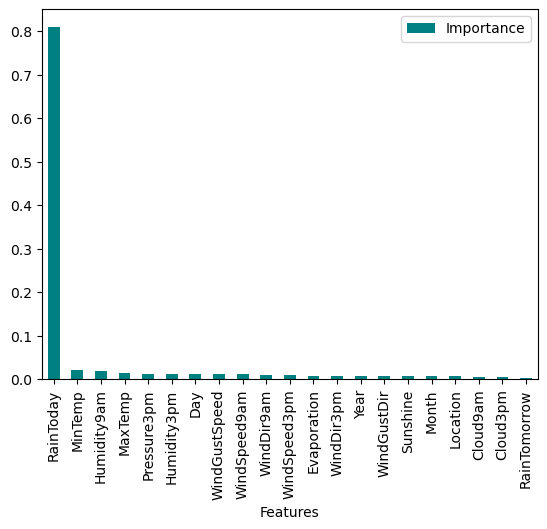

In [129]:
# Lets ckeck the feature importance using Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

### Creating train test split

In [130]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [131]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=195)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regression

In [132]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.3454711723305512
R2 Score is: 83.37945922529566
Cross Validation Score is: 81.96404344800247
R2 Score - Cross Validation Score is 1.415415777293191


### L1 -- Lasso Regression

In [133]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.3454546054415038
R2 Score is: 83.38105324572241
Cross Validation Score is: 81.99810989680871
R2 Score - Cross Validation Score is 1.3829433489136989


### L2 -- Ridge Regression

In [134]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.3454711687738426
R2 Score is: 83.37945956752057
Cross Validation Score is: 81.96404334934424
R2 Score - Cross Validation Score is 1.4154162181763326


### Elastic Net

In [135]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.34542558306900784
R2 Score is: 83.383845514201
Cross Validation Score is: 81.98116526381284
R2 Score - Cross Validation Score is 1.4026802503881584


### Support Vector Regression

In [136]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.32843058625075583
R2 Score is: 84.97865870487686
Cross Validation Score is: 81.66519203956125
R2 Score - Cross Validation Score is 3.313466665315616


In [137]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.3440523335996318
R2 Score is: 83.51569891120384
Cross Validation Score is: 77.22070684510147
R2 Score - Cross Validation Score is 6.294992066102367


In [138]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.35810415934287115
R2 Score is: 82.14169428715655
Cross Validation Score is: 81.17423355897803
R2 Score - Cross Validation Score is 0.9674607281785228


### Decision Tree Regressor

In [139]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3732518108379977
R2 Score is: 80.59894399166029
Cross Validation Score is: 74.35374603214827
R2 Score - Cross Validation Score is 6.245197959512026


### Random Forest Regressor

In [140]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.2675654878882848
R2 Score is: 90.03030866688118
Cross Validation Score is: 85.27971548047432
R2 Score - Cross Validation Score is 4.75059318640686


In [141]:
model=RandomForestRegressor(random_state=195)
regressor(model, x, y)

Root Mean Square Error is: 0.2698398184067963
R2 Score is: 89.86010180996112
Cross Validation Score is: 85.14909335137786
R2 Score - Cross Validation Score is 4.711008458583265


### K Neighbors Regressor

In [142]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3691528351387256
R2 Score is: 81.02272115276618
Cross Validation Score is: 76.73593482924603
R2 Score - Cross Validation Score is 4.286786323520147


### SGD Regressor

In [143]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3469030283328222
R2 Score is: 83.24140117246749
Cross Validation Score is: 81.84731642491595
R2 Score - Cross Validation Score is 1.3940847475515454


### Gradient Boosting Regressor

In [144]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3194680367365034
R2 Score is: 85.78730787936229
Cross Validation Score is: 82.82012769429109
R2 Score - Cross Validation Score is 2.9671801850712


### Ada Boost Regressor

In [145]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.34601092821399176
R2 Score is: 83.32748358476177
Cross Validation Score is: 82.0422087689434
R2 Score - Cross Validation Score is 1.2852748158183687


### Extra Trees Regressor

In [146]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.25995510981366854
R2 Score is: 90.58937993958057
Cross Validation Score is: 86.25969067046135
R2 Score - Cross Validation Score is 4.329689269119214


In [147]:
model=ExtraTreesRegressor(random_state=195)
regressor(model, x, y)

Root Mean Square Error is: 0.26399594304803387
R2 Score is: 90.2945421358368
Cross Validation Score is: 86.08883339696783
R2 Score - Cross Validation Score is 4.205708738868978


Comparing all the above the Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.

# Hyper parameter tuning

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=195)

In [149]:
x_test.shape

(1598, 21)

In [150]:
y_test.shape

(1598,)

In [151]:
x_train.shape

(6389, 21)

In [152]:
y_train.shape

(6389,)

In [153]:
#ExtraTreesRegressor?

In [154]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [155]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1],
              'random_state' : [None, 195],
              'n_estimators': [100, 200, 300]}

In [156]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [157]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1],
                         'random_state': [None, 195]})

In [158]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': None}

In [160]:
final_model = ExtraTreesRegressor(criterion = 'squared_error', max_features = 'sqrt', n_jobs = -1, random_state = None, n_estimators = 200)

In [161]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [162]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [163]:
# final accuracy score 
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 90.72671223188502


In [164]:
# final Cross Validation score 
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 86.15694072376942


In [165]:
# final RMSE
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 0.25805133321129303


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

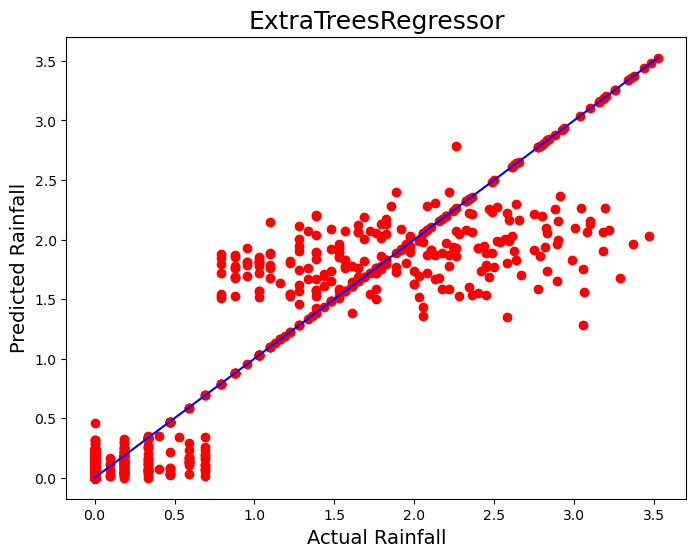

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Plotting the Final model Actual Rainfall vs Predicted Rainfall.

# Saving the model in pickle Format

In [167]:
# pickeling or serialization of a file
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Rainfall_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle

# Prediction Conclusion:

In [168]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,0.000000,0.082885
1,0.000000,0.007498
2,3.063391,1.555660
3,0.000000,0.067407
4,0.000000,0.000000
...,...,...
1593,0.000000,0.148864
1594,0.000000,0.010211
1595,1.526056,1.898573
1596,0.000000,0.018217


Hence predicted the "Rainfall" using the final Model.

In [169]:
df_comparison.to_csv('Rainfall_Prediction_Weather_Forecasting_Rainfall_Prediction.csv')

Saving the comparison file as a csv file.

# Thank You